# TD2 : Réseaux de neurones convolutionnels


## Exercice 0

Repartir du dataset CIFAR10 en gardant les images en (32,32, 3)
Faire :
 - Convolution 2D (32,3)
 - Maxpooling (2,2)
 - Convolution 2D (32,3)
 - Maxpooling (2,2)
 - Flatten()
 - Créer un MLP avec une couche d'entrée de 1024 et une couche de sortie de 10 avec un softmax

In [9]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier

import tensorflow as tf

import numpy as np
from sklearn.preprocessing import StandardScaler


Charger et formatter les données

In [21]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [23]:
# Convertir en float32 d'abord, puis normaliser
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [24]:
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

y_train = to_categorical(y_train_flat, 10)
y_test = to_categorical(y_test_flat, 10)

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [29]:
model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=128)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4096 - loss: 1.6677
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6326 - loss: 1.0535
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7081 - loss: 0.8461
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7608 - loss: 0.6956
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8167 - loss: 0.5473
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8586 - loss: 0.4205
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8981 - loss: 0.3127
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9313 - loss: 0.2201
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9528 - loss: 0.1510
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9672 - loss: 0.1122
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9788 - loss: 0.0732
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━━

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 6.5116
Test accuracy : 0.6623
Train loss : 0.0326
Train accuracy : 0.9924


Ajout de dropout pour réduire le sur apprentissage

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [32]:
model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=128)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4186 - loss: 1.6582
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6371 - loss: 1.0369
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6987 - loss: 0.8632
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7503 - loss: 0.7290
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7852 - loss: 0.6258
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8184 - loss: 0.5285
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8573 - loss: 0.4273
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8802 - loss: 0.3569
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9005 - loss: 0.3008
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9163 - loss: 0.2486
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9236 - loss: 0.2273
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 1.7177
Test accuracy : 0.6989
Train loss : 0.0068
Train accuracy : 0.9989


## Exercice 1

### 1. Télécharger le dataset ‘stanford_dogs’ directement depuis votre notebook

In [15]:
import tensorflow_datasets as tfds

In [16]:
(train_set, test_set), dataset_info = tfds.load("stanford_dogs",
                                                 split=['train', 'test'],
                                                 shuffle_files=True,
                                                 as_supervised=True,
                                                 with_info=True)

### 2 - Récupérez le nombre de classes à partir des informations. Combien y at’il de classes ?

In [47]:
# Explorer la structure du dataset
print("\nInformations du dataset:")
print(f"Nombre de classes: {dataset_info.features['label'].num_classes}")
print(f"Noms des classes: {dataset_info.features['label'].names[:10]}...")  # Afficher les 10 premières

# Regarder la forme des données
print("\nEn regardant un échantillon du train_set:")
for i, (image, label) in enumerate(train_set.take(1)):
    print(f"Forme de l'image: {image.shape}")
    print(f"Type de l'image: {image.dtype}")
    print(f"Label: {label}")
    print(f"Valeurs min/max de l'image: {tf.reduce_min(image)}/{tf.reduce_max(image)}")
    break


Informations du dataset:
Nombre de classes: 120
Noms des classes: ['n02085620-chihuahua', 'n02085782-japanese_spaniel', 'n02085936-maltese_dog', 'n02086079-pekinese', 'n02086240-shih-tzu', 'n02086646-blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-rhodesian_ridgeback', 'n02088094-afghan_hound']...

En regardant un échantillon du train_set:
Forme de l'image: (500, 333, 3)
Type de l'image: <dtype: 'uint8'>
Label: 36
Valeurs min/max de l'image: 0/255


### Explication de la structure du dataset

Le dataset `stanford_dogs` chargé avec `tfds.load()` vous donne :

1. **`train_set` et `test_set`** : Ce sont des objets `tf.data.Dataset`, pas des arrays numpy classiques
2. **Chaque élément** contient un tuple `(image, label)` où :
   - `image` : Tensor de forme variable (les images ont des tailles différentes)
   - `label` : Entier représentant la classe (de 0 à 119 pour les 120 races de chiens)

**Points importants :**
- Les images ont des **tailles différentes** (ex: 500x333, 400x600, etc.)
- Les valeurs des pixels sont en **uint8** (0-255)
- Pour utiliser le dataset, vous devez l'itérer avec `.take()`, `.batch()`, etc.

### 3 - Visualisez les premières images du dataset à l’aide de la méthode show_examples 

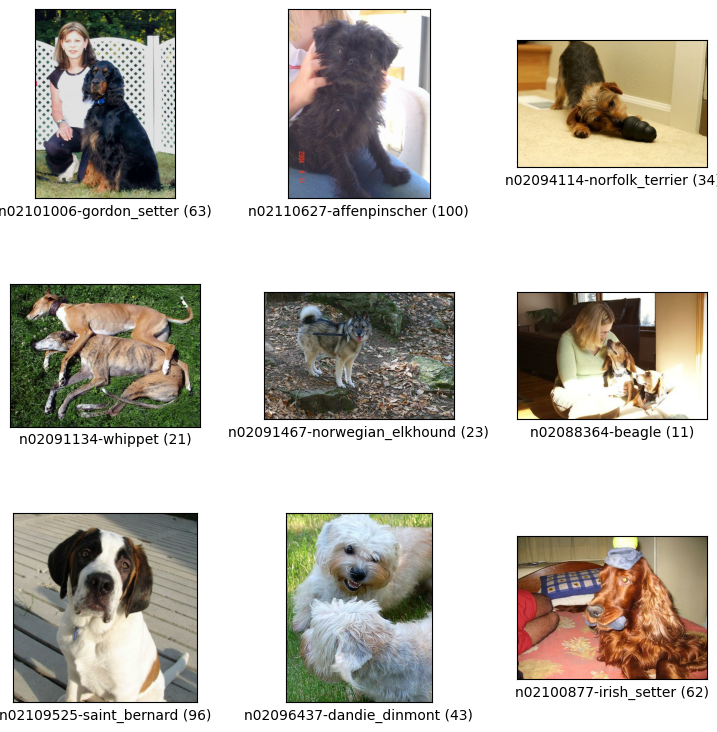

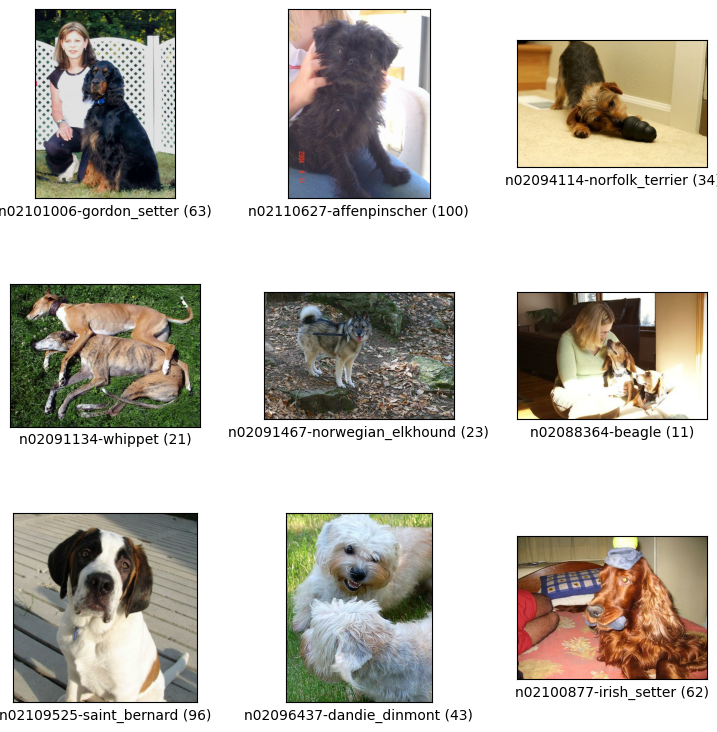

In [52]:
tfds.visualization.show_examples(train_set, dataset_info)

### 4 - Récupérez la première image. Cela peut se faire avec next et iter, ou bien avec take et get_single_element. Attention, n’oubliez pas que ces méthodes récupères un tuple (image, label).

### 5 - Convertissez cette image en grayscale (nécessite d’installer tensorflow_io) avec rgb_to_grayscale.

### 6 - Une couche de convolution va être appliquée sur l’image grayscale. En tensorflow, les données sont transmises aux différentes couches des réseaux de neurones par batch. Il faut donc rajouter une dimension devant l’image pour représenter le batch. Dans un premier temps, vérifier les dimensions de l’image (avec np.shape par exemple). Ajoutez une dimension avec expand_dims, puis vérifiez le résultat.

### 7 - Définissez un noyau de convolution, à l’aide d’un array numpy à 2 dimensions. Chacune des dimenions devra contenir 3 éléments de type float32. Définissez les valeurs vous-même, manuellement.

### 8 - Vous allez maintenant appliquer le noyau de convolution sur l’image grayscale, à l’aide de tf.nn.conv2d. Utilisez un stride de 1 et un padding ‘SAME’. Le noyau doit avoir les bonnes dimensions pour être utilisé par conv2d. Il faut le redimensionner à l’aide de tf.reshape. Les dimensions sont [hauteur, largeur, canaux_entrants, canaux_sortant]. Appliquez le filtre et visualisez l’image en mode ‘grayscale’ (plt.imshow(..., cmap = ‘grayscale’))

### 9 - Maintenant que vous savez appliquer un noyau, améliorez votre programme afin qu’il implémente un filtre de Sobel https://fr.wikipedia.org/wiki/Filtre_de_Sobel

In [ ]:
# Fonction de préprocessing pour redimensionner et normaliser
def preprocess_image(image, label):
    # Redimensionner l'image à 224x224 (taille courante pour les CNN)
    image = tf.image.resize(image, [224, 224])
    # Normaliser les valeurs entre 0 et 1
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Appliquer le préprocessing au dataset
train_processed = train_set.map(preprocess_image)
test_processed = test_set.map(preprocess_image)

# Vérifier les nouvelles dimensions
for image, label in train_processed.take(1):
    print(f"Nouvelle forme de l'image: {image.shape}")
    print(f"Nouveau type de l'image: {image.dtype}")
    print(f"Nouvelles valeurs min/max: {tf.reduce_min(image):.3f}/{tf.reduce_max(image):.3f}")
    break